# Exploratory Data Analysis of Hourly Weather Conditions

## Project Overview
## Goal

#### The goal of this project is to conduct a comprehensive exploratory data analysis (EDA) on hourly weather data to identify patterns, seasonal trends, and relationships among temperature, wind speed, air pressure, visibility, humidity, and weather conditions.

## Dataset

#### The dataset contains hourly weather observations with the following variables:
### Column
#### Date/Time= Timestamp of observation
#### Temp_C= Air temperature (°C)
#### Dew Point Temp_C= Dew point temperature (°C)
#### Rel Hum_%= Relative humidity (%)
#### Wind Speed_km/h= Wind speed (km/h)
#### Visibility_km=	Visibility distance (km)
#### Press_kPa=	Atmospheric pressure (kPa)
#### Weather=	Categorical weather condition

## Tools

### This project was conducted using Python with libraries including:

#### Pandas — for data cleaning, manipulation, and aggregation

#### Matplotlib & Seaborn — for data visualization

#### NumPy — for numerical calculations and handling missing values

#### upyter Notebook — for interactive analysis and reporting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data= pd.read_csv('Weather.csv')

In [20]:
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [7]:
data.shape

(8784, 8)

In [8]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [9]:
data.index

RangeIndex(start=0, stop=8784, step=1)

In [11]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [5]:
data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [46]:
data.describe()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Rolling_Temp
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8761.000000
mean,2012-07-01 23:30:00,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,8.826257
min,2012-01-01 00:00:00,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,-19.854167
25%,2012-04-01 11:45:00,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,0.120833
50%,2012-07-01 23:30:00,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,9.812500
75%,2012-10-01 11:15:00,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,19.241667
max,2012-12-31 23:00:00,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000,28.520833
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,11.306824


In [22]:
data.count()
# it shows the tottal no. of non-null values for each column. It can be aplied for a single column as well as on whole column.

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

In [10]:
data.info()
# provide basic information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [48]:
# Convert Date/Time into to_datetime format 
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [49]:
# convert Weather conlunn name Into Wether Condition
data.rename(columns = {'Weather': 'Weather_Condition'},inplace= True)


# Exploratory Data Analysis (EDA)

## Count of top weather conditions

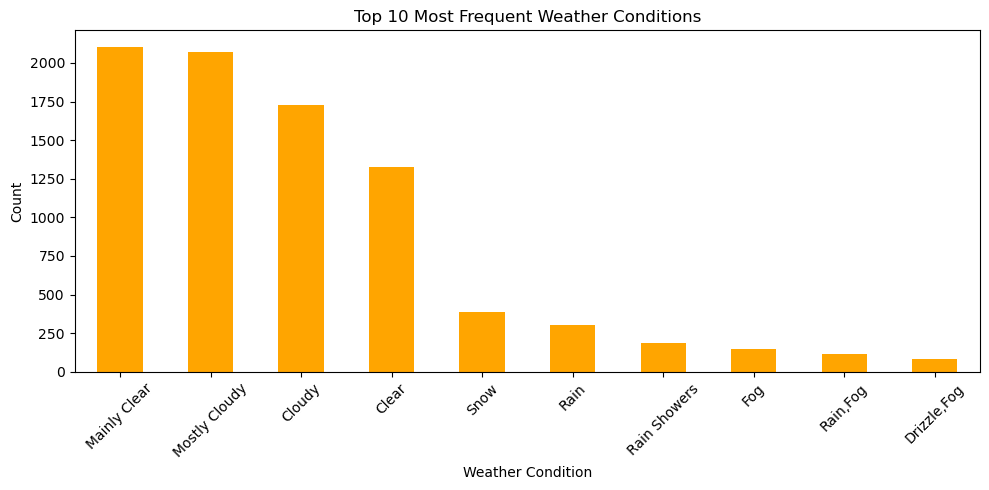

In [23]:
# Get the top 10 most frequent weather conditions from the dataset
top_10 = data['Weather_Condition'].value_counts().head(10)

# Plot the top 10 weather conditions as a bar chart
plt.figure(figsize=(10,5))
top_10.plot(kind='bar', color='orange')

plt.title("Top 10 Most Frequent Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.savefig("D:/weather-project/Images/top weather conditions.png")
plt.tight_layout()

#### Insight: Top Weather Conditions

##### The dataset is dominated by Mainly Clear, Mostly Clear, Clear and Cloudy conditions, indicating that most days experienced stable and favorable weather. Weather events like Snow, Rain, Fog, Drizzle and so on occur, but far less frequently, showing that severe or disruptive weather is relatively rare compared to normal conditions.

#### Summary:
##### ✔️ Mainly Clear & Mostly clear → most common
##### ✔️ Clear & Cloudy is also frequent
##### ✔️ Rain, Snow, Fog, Drizzle and so on → significantly less frequent

## Wind Speed Distribution (Histogram)

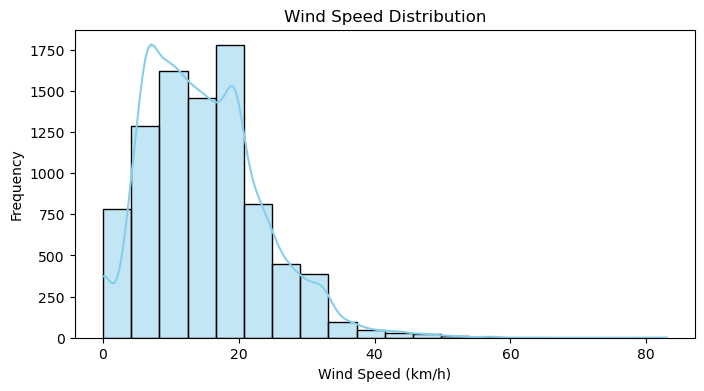

In [6]:
# Shows how wind speeds are distributed.
plt.figure(figsize=(8,4))
sns.histplot(data['Wind Speed_km/h'], bins=20, kde=True, color='skyblue')
plt.title("Wind Speed Distribution")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Frequency")
plt.savefig("D:/weather-project/Images/ wind speed distribution.png")
plt.show()

#### Insight: Wind Speed Distribution

##### Most wind speeds fall between 5–25 km/h, indicating generally mild to moderate wind conditions throughout the dataset. The distribution is right-skewed, meaning higher wind speeds (above 40 km/h) are rare but do occur occasionally. This suggests that extreme wind events are uncommon, while normal weather typically experiences steady, manageable wind levels.

#### Summary:
##### ✔️ Majority wind speed: 5–25 km/h
##### ✔️ Rare high wind events above 40 km/h
##### ✔️ Right-skewed distribution showing mostly calm to moderate conditions

# Temperature Distribution (Histogram / Boxplot)

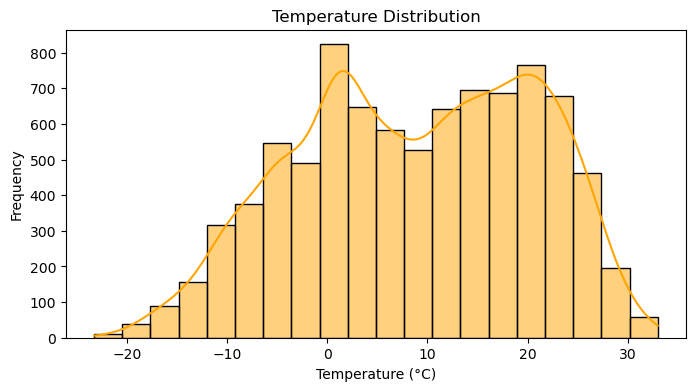

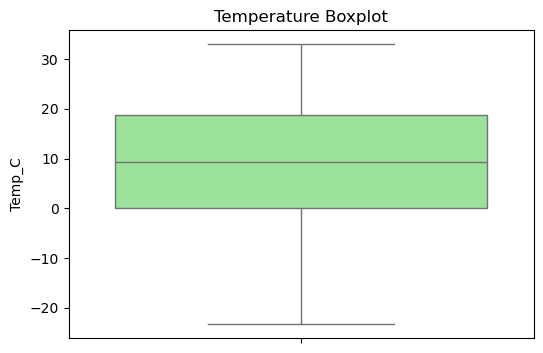

In [12]:
# Shows temperature trends and outliers
plt.figure(figsize=(8,4))
sns.histplot(data['Temp_C'], bins=20, kde=True, color='orange')
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.savefig("D:/weather-project/Images/temperature distribution")
plt.show()

#  boxplot for outliers
plt.figure(figsize=(6,4))
sns.boxplot(y=data['Temp_C'], color='lightgreen')
plt.title("Temperature Boxplot")
plt.savefig("D:/weather-project/Images/temperature boxplot")
plt.show()

### Insight:
#### The temperature distribution shows a wide variation ranging from below –20°C to above 30°C, indicating diverse seasonal conditions. The data appears bimodal, with noticeable peaks around 0°C to 5°C and 18°C to 22°C, suggesting two major weather phases—colder and warmer periods. Most temperature observations fall between –5°C to 25°C, indicating that extremely low and extremely high temperatures occur less frequently compared to moderate conditions. This highlights a balanced climate pattern with distinct cold and warm seasons.

## Scatter Plot: Wind Speed vs Visibility

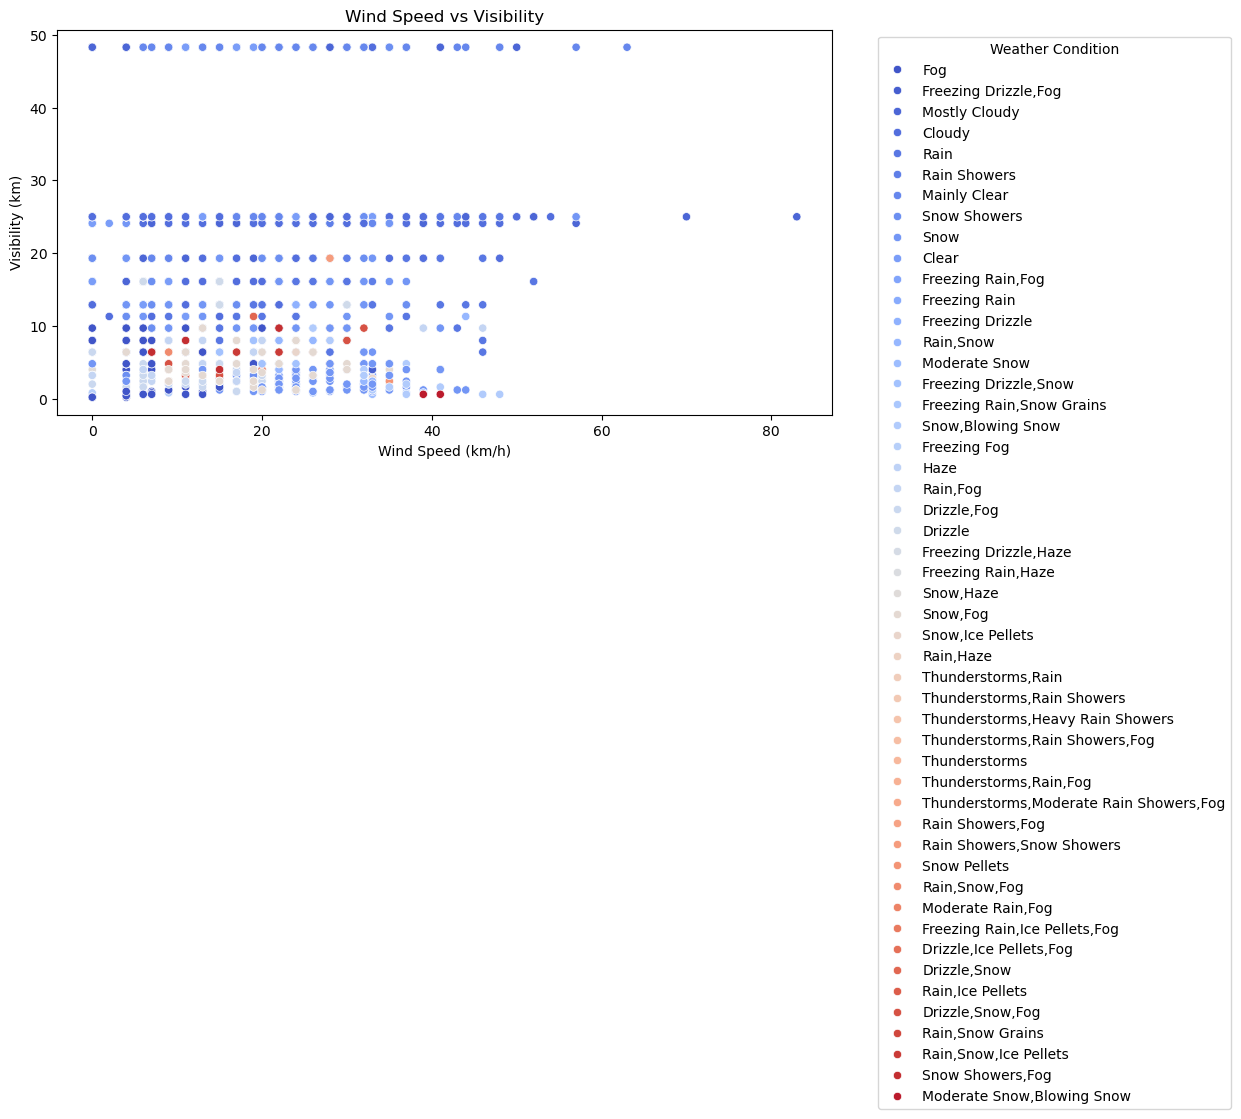

In [8]:
# Shows relationship between wind speed and visibility.
plt.figure(figsize=(10,5))
sns.scatterplot(x='Wind Speed_km/h', y='Visibility_km', hue='Weather Condition', data=data, palette='coolwarm')
plt.title("Wind Speed vs Visibility")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Visibility (km)")
plt.legend(title="Weather Condition", bbox_to_anchor=(1.05, 1), loc=2)
plt.savefig("D:/weather-project/Images/Wind Speed vs Visibility")
plt.show()


### Insight
#### Visibility does not show a strong correlation with wind speed; however, lower visibility appears more frequently at moderate wind speeds, while high visibility occurs across all wind ranges.

## Line Chart of temperature trend

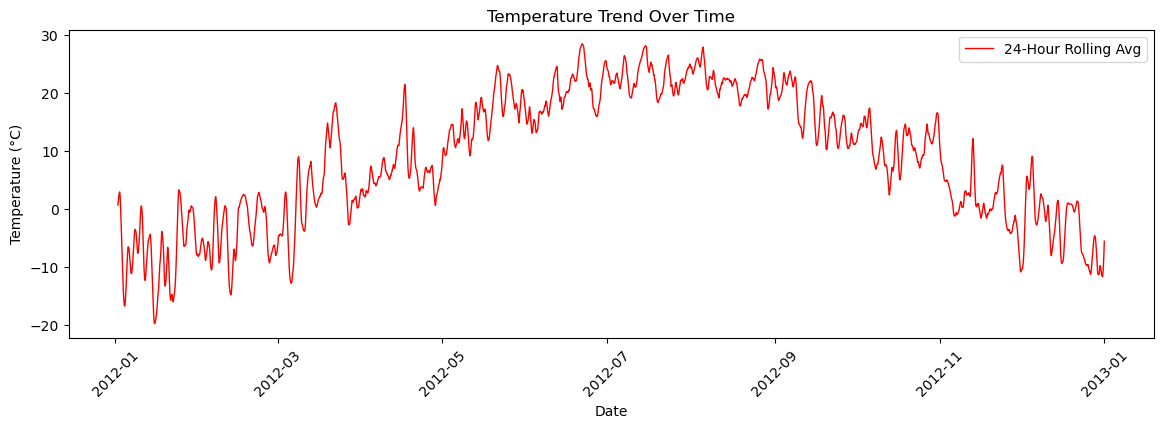

In [24]:
# Convert Date/Time into to_datetime format 
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Make 24 hours mean for keep clean the line chart
data['Rolling_Temp'] = data['Temp_C'].rolling(window=24).mean()

plt.figure(figsize=(14,4))
#make a line chart for temperature trend
plt.plot(data['Date/Time'], data['Rolling_Temp'], color='red', linewidth=1, label='24-Hour Rolling Avg')
plt.title("Temperature Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.xticks(rotation=45)
plt.savefig("D:/weather-project/Images/temperature trend.png")
plt.show()

### Insights:
#### The trend indicates a progressive rise in temperature during the initial months, followed by a distinct mid-year peak, after which the temperature consistently declines towards the end of the year.

# Air Pressure Trend Over Time

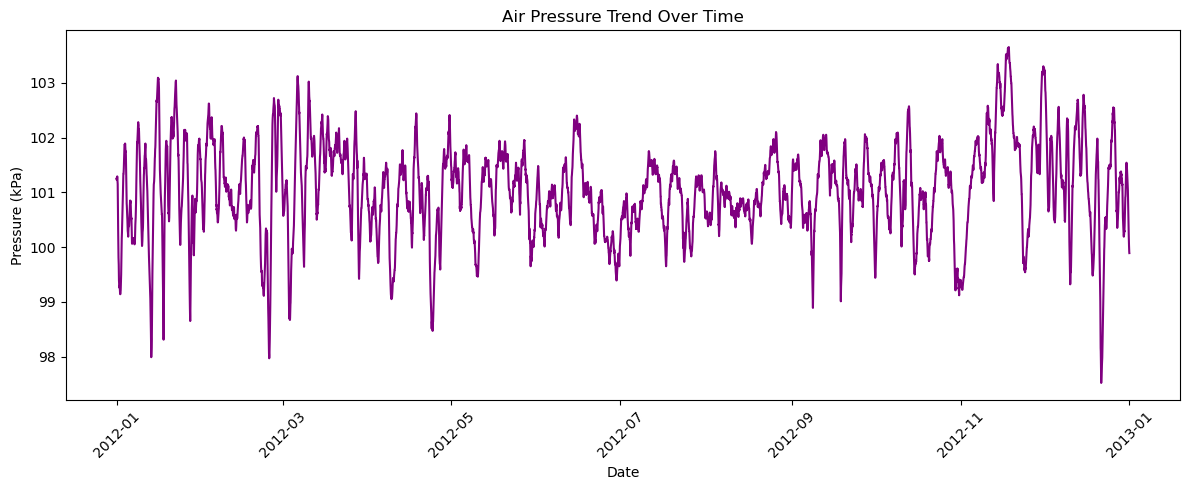

In [25]:
# Convert Date/Time into to_datetime format 
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Create a line chart to show air pressure over time
plt.figure(figsize=(12,5))
plt.plot(data['Date/Time'], data['Press_kPa'], color='purple')

plt.title("Air Pressure Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Pressure (kPa)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("D:/weather-project/Images/Air_pressure trend.png")
plt.show()


### Insight: 
#### Air pressure remains generally stable throughout the year between 99–103 kPa, with occasional sharp drops indicating brief periods of unstable weather. Mid-year pressure appears slightly steadier, while variability increases toward the year’s end.

## Mean Visibility by Weather Condition (Bar Chart)

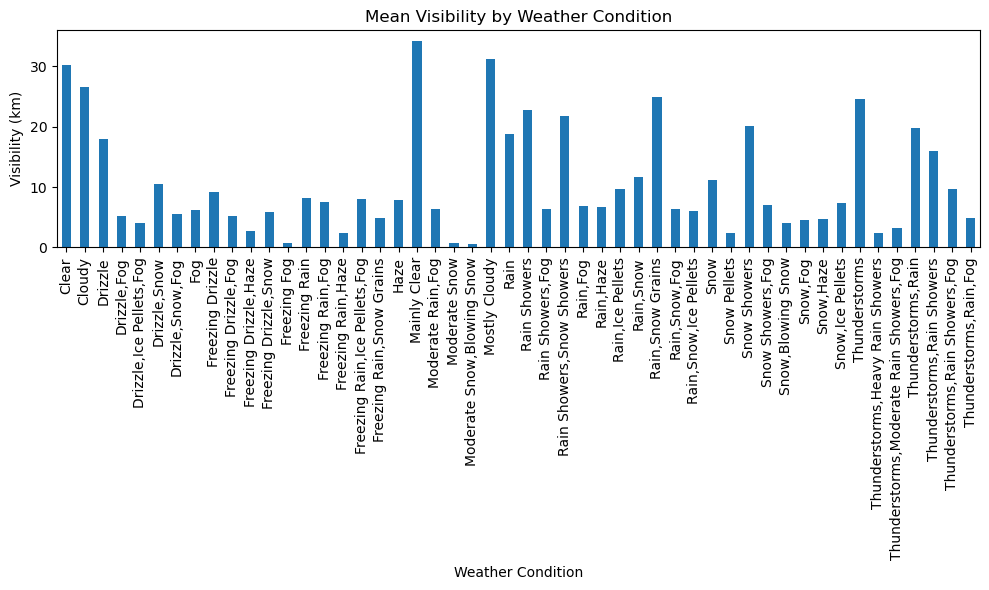

In [26]:
plt.figure(figsize=(10,6))
data.groupby('Weather_Condition')['Visibility_km'].mean().plot(kind='bar')

plt.title("Mean Visibility by Weather Condition")
plt.ylabel("Visibility (km)")
plt.xlabel("Weather Condition")

plt.tight_layout()
plt.savefig("D:/weather-project/Images/mean_visibility.png")   # SAVE FIRST
plt.show()                                              # THEN SHOW


# Q. no. 01
## Find all the unique "Wind Speed" values in the data.

In [36]:
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [8]:
data['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2])

# Q. no. 02
## Find the number of times when the "weather is exectly clear?

### there are 3 different way to solve this problem
### 01. value_counts()

In [27]:
data.Weather_Condition.value_counts()

Weather_Condition
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle      

### 02. filtering

In [28]:
data[data.Weather_Condition == 'Clear']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Condition,Rolling_Temp
67,2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear,-12.629167
114,2012-01-05 18:00:00,-7.1,-14.4,56,11,25.0,100.71,Clear,-6.566667
115,2012-01-05 19:00:00,-9.2,-15.4,61,7,25.0,100.80,Clear,-6.600000
116,2012-01-05 20:00:00,-9.8,-15.7,62,9,25.0,100.83,Clear,-6.683333
117,2012-01-05 21:00:00,-9.0,-14.8,63,13,25.0,100.83,Clear,-6.741667
...,...,...,...,...,...,...,...,...,...
8646,2012-12-26 06:00:00,-13.4,-14.8,89,4,25.0,102.47,Clear,-10.383333
8698,2012-12-28 10:00:00,-6.1,-8.6,82,19,24.1,101.27,Clear,-4.670833
8713,2012-12-29 01:00:00,-11.9,-13.6,87,11,25.0,101.31,Clear,-7.395833
8714,2012-12-29 02:00:00,-11.8,-13.1,90,13,25.0,101.33,Clear,-7.708333


### 03. groupby

In [29]:
data.groupby('Weather_Condition').get_group('Clear')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Condition,Rolling_Temp
67,2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear,-12.629167
114,2012-01-05 18:00:00,-7.1,-14.4,56,11,25.0,100.71,Clear,-6.566667
115,2012-01-05 19:00:00,-9.2,-15.4,61,7,25.0,100.80,Clear,-6.600000
116,2012-01-05 20:00:00,-9.8,-15.7,62,9,25.0,100.83,Clear,-6.683333
117,2012-01-05 21:00:00,-9.0,-14.8,63,13,25.0,100.83,Clear,-6.741667
...,...,...,...,...,...,...,...,...,...
8646,2012-12-26 06:00:00,-13.4,-14.8,89,4,25.0,102.47,Clear,-10.383333
8698,2012-12-28 10:00:00,-6.1,-8.6,82,19,24.1,101.27,Clear,-4.670833
8713,2012-12-29 01:00:00,-11.9,-13.6,87,11,25.0,101.31,Clear,-7.395833
8714,2012-12-29 02:00:00,-11.8,-13.1,90,13,25.0,101.33,Clear,-7.708333


# Q. no. 03
### Find the number of times when the "Wind Speed was exectly four km/h"

In [113]:
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [9]:
data[data['Wind Speed_km/h'] == 4]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
96,1/5/2012 0:00,-8.8,-11.7,79,4,9.7,100.32,Snow
101,1/5/2012 5:00,-7.0,-9.5,82,4,4.0,100.19,Snow
146,1/7/2012 2:00,-8.1,-11.1,79,4,19.3,100.15,Cloudy
...,...,...,...,...,...,...,...,...
8768,12/31/2012 8:00,-8.6,-10.3,87,4,3.2,101.14,Snow Showers
8769,12/31/2012 9:00,-8.1,-9.6,89,4,2.4,101.09,Snow
8770,12/31/2012 10:00,-7.4,-8.9,89,4,6.4,101.05,"Snow,Fog"
8772,12/31/2012 12:00,-5.8,-7.5,88,4,12.9,100.78,Snow


In [8]:
data.groupby('Wind Speed_km/h').get_group(4)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
96,1/5/2012 0:00,-8.8,-11.7,79,4,9.7,100.32,Snow
101,1/5/2012 5:00,-7.0,-9.5,82,4,4.0,100.19,Snow
146,1/7/2012 2:00,-8.1,-11.1,79,4,19.3,100.15,Cloudy
...,...,...,...,...,...,...,...,...
8768,12/31/2012 8:00,-8.6,-10.3,87,4,3.2,101.14,Snow Showers
8769,12/31/2012 9:00,-8.1,-9.6,89,4,2.4,101.09,Snow
8770,12/31/2012 10:00,-7.4,-8.9,89,4,6.4,101.05,"Snow,Fog"
8772,12/31/2012 12:00,-5.8,-7.5,88,4,12.9,100.78,Snow


In [115]:
data['Wind Speed_km/h'].value_counts

<bound method IndexOpsMixin.value_counts of 0        4
1        4
2        7
3        6
4        7
        ..
8779    30
8780    24
8781    28
8782    28
8783    30
Name: Wind Speed_km/h, Length: 8784, dtype: int64>

# Q.no. 04 Find out the null values in the data

In [11]:
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [17]:
data.notnull().sum()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

# Q.no. 05 Rename the column name 'Weather' of the dataframe to 'Weather Condition

In [30]:
data.rename(columns = {'Weather_Condition': 'Weather_Condition'},inplace= True)

In [31]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Condition,Rolling_Temp
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,NaN
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,NaN
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",NaN
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",NaN
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,NaN


# Q.06) What is the mean "visibilty"?

In [32]:
data.Visibility_km.mean()

np.float64(27.664446721311478)

# Q.07) What is the standard deviation of 'Pressure' in this data?

In [33]:
data.Press_kPa.std()

0.8440047459486474

# Q.08) What is the variance of 'Relative Humidity' in this data?

In [34]:
data.head()
data['Rel Hum_%'].var()

286.2485501984998

# Q.09) Find all the instances when 'Snow' was recorded

In [35]:
data[data['Weather_Condition'] == 'Snow']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Condition,Rolling_Temp
55,2012-01-03 07:00:00,-14.0,-19.5,63,19,25.0,100.95,Snow,-4.979167
84,2012-01-04 12:00:00,-13.7,-21.7,51,11,24.1,101.25,Snow,-16.720833
86,2012-01-04 14:00:00,-11.3,-19.0,53,7,19.3,100.97,Snow,-16.458333
87,2012-01-04 15:00:00,-10.2,-16.3,61,11,9.7,100.89,Snow,-16.266667
88,2012-01-04 16:00:00,-9.4,-15.5,61,13,19.3,100.79,Snow,-16.020833
...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,-7.808333
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,-7.225000
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,-6.670833
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,-6.108333


In [36]:
data.groupby('Weather_Condition').get_group('Snow')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Condition,Rolling_Temp
55,2012-01-03 07:00:00,-14.0,-19.5,63,19,25.0,100.95,Snow,-4.979167
84,2012-01-04 12:00:00,-13.7,-21.7,51,11,24.1,101.25,Snow,-16.720833
86,2012-01-04 14:00:00,-11.3,-19.0,53,7,19.3,100.97,Snow,-16.458333
87,2012-01-04 15:00:00,-10.2,-16.3,61,11,9.7,100.89,Snow,-16.266667
88,2012-01-04 16:00:00,-9.4,-15.5,61,13,19.3,100.79,Snow,-16.020833
...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,-7.808333
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,-7.225000
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,-6.670833
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,-6.108333


In [37]:
data['Weather_Condition'].value_counts()

Weather_Condition
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle      

In [38]:
data[data['Weather_Condition'].str.contains('Snow')].head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Condition,Rolling_Temp
41,2012-01-02 17:00:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers,2.479167
44,2012-01-02 20:00:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers,1.454167


# Q.10) Find all the instances when 'Wind Speed is avobe 24' and 'visibility is 25'

In [22]:
data[(data['Wind Speed_km/h'] > 24) & (data['Visibility_km']== 25)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,12/28/2012 17:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,12/30/2012 17:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,12/30/2012 19:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


In [27]:
data[(data['Wind Speed_km/h'] > 24) & (data.Visibility_km == 25)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,12/28/2012 17:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,12/30/2012 17:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,12/30/2012 19:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


# Q.11) What is the mean value of each column against each "Weather Condition"?

In [31]:
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [39]:
data.groupby('Weather_Condition').mean(numeric_only=True)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Rolling_Temp
Weather_Condition,,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443,8.418788
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441,7.360877
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366,7.577134
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625,7.883646
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000,-4.358333
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000,-0.714583
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333,0.935278
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067,5.821201
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857,-8.280357


# Q.12) What is the minimum & maximum value of each column against each other 'Weather Condition?

In [40]:
data.groupby('Weather_Condition').min().head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Rolling_Temp
Weather_Condition,,,,,,,,
Clear,2012-01-03 19:00:00,-23.3,-28.5,20,0,11.3,99.52,-19.758333
Cloudy,2012-01-01 17:00:00,-21.4,-26.8,18,0,11.3,98.39,-18.387500
Drizzle,2012-01-23 21:00:00,1.1,-0.2,74,0,6.4,97.84,-4.220833
"Drizzle,Fog",2012-01-23 20:00:00,0.0,-1.6,85,0,1.0,98.65,-4.895833
"Drizzle,Ice Pellets,Fog",2012-12-17 09:00:00,0.4,-0.7,92,20,4.0,100.79,-4.358333


In [124]:
data.groupby('Weather Condition').max().head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,,
Clear,9/9/2012 5:00,32.8,20.4,99,33,48.3,103.63
Cloudy,9/9/2012 23:00,30.5,22.6,99,54,48.3,103.65
Drizzle,9/30/2012 3:00,18.8,17.7,96,30,25.0,101.56
"Drizzle,Fog",9/30/2012 2:00,19.9,19.1,100,28,9.7,102.07
"Drizzle,Ice Pellets,Fog",12/17/2012 9:00,0.4,-0.7,92,20,4.0,100.79


# Q.13) Show all the records where weather condition is fog.

In [41]:
data.groupby('Weather_Condition').get_group('Fog')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Condition,Rolling_Temp
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,NaN
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,NaN
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,NaN
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog,NaN
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog,NaN
...,...,...,...,...,...,...,...,...,...
8716,2012-12-29 04:00:00,-16.0,-17.2,90,6,9.7,101.25,Fog,-8.537500
8717,2012-12-29 05:00:00,-14.8,-15.9,91,4,6.4,101.25,Fog,-8.945833
8718,2012-12-29 06:00:00,-13.8,-15.3,88,4,9.7,101.25,Fog,-9.320833
8719,2012-12-29 07:00:00,-14.8,-16.4,88,7,8.0,101.22,Fog,-9.729167


In [42]:
data[data['Weather_Condition'] == 'Fog'].head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Condition,Rolling_Temp
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,NaN
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,NaN


# Q.14) Find all instances when weather is clear or visibility is avobe 40

In [43]:
data[(data['Weather_Condition'] == 'Clear') | (data.Visibility_km > 40)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Condition,Rolling_Temp
67,2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear,-12.629167
106,2012-01-05 10:00:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear,-8.487500
107,2012-01-05 11:00:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear,-8.129167
108,2012-01-05 12:00:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear,-7.754167
109,2012-01-05 13:00:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear,-7.420833
...,...,...,...,...,...,...,...,...,...
8749,2012-12-30 13:00:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy,-10.037500
8750,2012-12-30 14:00:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear,-10.141667
8751,2012-12-30 15:00:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear,-10.245833
8752,2012-12-30 16:00:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear,-10.366667


# Q.15) Find all instances when:  
### a) Weather condition is clear and relative humidity is avobe 50
### or
### b) Visibility is avobe 40

In [44]:
data[(data['Weather_Condition'] == 'Clear') & (data['Rel Hum_%'] > 50) | (data.Visibility_km > 40)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Condition,Rolling_Temp
106,2012-01-05 10:00:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear,-8.487500
107,2012-01-05 11:00:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear,-8.129167
108,2012-01-05 12:00:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear,-7.754167
109,2012-01-05 13:00:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear,-7.420833
110,2012-01-05 14:00:00,-5.1,-10.7,65,22,48.3,100.46,Mainly Clear,-7.162500
...,...,...,...,...,...,...,...,...,...
8749,2012-12-30 13:00:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy,-10.037500
8750,2012-12-30 14:00:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear,-10.141667
8751,2012-12-30 15:00:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear,-10.245833
8752,2012-12-30 16:00:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear,-10.366667


## Key Insights (from EDA)

#### Predominantly Stable Weather: Clear and partly cloudy days dominate, while severe weather (Rain, Snow, Fog, Drizzle) is rare.

#### Mild to Moderate Winds: Most wind speeds are 5–25 km/h; extreme winds are uncommon.

#### Seasonal Temperature Patterns: Moderate temperatures dominate, with clear seasonal variation and rare extremes.

#### Visibility Trends: Visibility largely unaffected by wind, except occasional dips at moderate wind speeds.

#### Air Pressure Stability: Mostly stable (99–103 kPa), with occasional sharp drops signaling short-term unstable weather.

#### Overall Climate Insight: Weather is generally stable, making it ideal for trend analysis and forecasting preparation.

## Key Findings

#### Stable, favorable weather dominates most days.

#### Extreme events (high wind, very low/high temperatures, poor visibility) are rare.

#### Temperature and air pressure exhibit clear seasonal patterns.

#### Visibility remains high for most weather conditions.

## Limitations

#### Data represents only one location and one year.

#### Hourly resolution may miss micro-events within the hour.

#### Some weather variables (e.g., precipitation amount, solar radiation) are not available.

#### Analysis is exploratory; no predictive modeling is included.

## Conclusion

#### This project demonstrates how real-world weather data can be cleaned, explored, and analyzed to uncover meaningful climate patterns and trends. The findings reveal a predominantly stable climate with clear seasonal behavior, validating the effectiveness of EDA techniques for understanding environmental data and preparing it for future forecasting or modeling tasks.